In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive/')
print(os.getcwd())

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content


In [ ]:
!pip install sentence_transformers

In [ ]:
import pandas as pd
import numpy as np
# import bcubed
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sentence_transformers import SentenceTransformer
from sklearn.metrics import cohen_kappa_score, silhouette_score
import timeit

import math
import typing as ty

from statistics import mean, harmonic_mean

import numpy as np

from scipy.optimize import linear_sum_assignment

In [ ]:

# # CWMG Letters
# file = pd.read_csv("letters_annotated.csv")
# file.head()

# AL data
file = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/event_timeline_generation/CWMG_action_tag_unfiltered.csv")
file.head()


,Unnamed: 0,date,sentence,cluster,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,action,index,keywords
0,0,"January 30, 2020",the first case was confirmed in Kerala's Thris...,0,NaN,NaN,NaN,Source: https://www.business-standard.com/arti...,'confirm',0,"'coronavirus case', 'Business Standard', 'News..."
1,1,"February 2, 2020",the second case was reported in Kerala's Alapp...,0,NaN,NaN,NaN,Source: https://www.who.int/india/emergencies/...,'report',1,"'satisfied ERROR', 'satisfied Second', 'Second..."
2,2,"February 3, 2020",the third case was reported in Kerala's Kasara...,0,NaN,NaN,NaN,Source: https://en.wikipedia.org/wiki/Timeline...,'report',2,"'third case', 'coronavirus case', 'Kasaragod d..."
3,3,"March 2, 2020",the Union Health Ministry reported two more ca...,1,NaN,NaN,NaN,NaN,'report',3,"'India Timeline', 'SARS-CoV-2 spread', 'sentin..."
4,4,"March 2, 2020",88 people who were in contact with the Hyderab...,1,NaN,NaN,NaN,NaN,'track',4,"'fellow passengers', 'India News', 'News Timel..."


In [ ]:
# CWMG Letters
# event_file = file.loc[(file.tag=='event') | (file.tag=='fact') | (file.tag == 'demand')]
# event_file = event_file[event_file['sentence'].notna()]
# event_file = event_file[event_file['cluster'].notna()]
# event_file = event_file[event_file['keywords'].notna()]
# event_file['id'] = event_file.index
# event_file.head()

# Covid-19 data
event_file = file[file['sentence'].notna()]
event_file.head()

,Unnamed: 0,date,sentence,cluster,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,action,index,keywords
0,0,"January 30, 2020",the first case was confirmed in Kerala's Thris...,0,NaN,NaN,NaN,Source: https://www.business-standard.com/arti...,'confirm',0,"'coronavirus case', 'Business Standard', 'News..."
1,1,"February 2, 2020",the second case was reported in Kerala's Alapp...,0,NaN,NaN,NaN,Source: https://www.who.int/india/emergencies/...,'report',1,"'satisfied ERROR', 'satisfied Second', 'Second..."
2,2,"February 3, 2020",the third case was reported in Kerala's Kasara...,0,NaN,NaN,NaN,Source: https://en.wikipedia.org/wiki/Timeline...,'report',2,"'third case', 'coronavirus case', 'Kasaragod d..."
3,3,"March 2, 2020",the Union Health Ministry reported two more ca...,1,NaN,NaN,NaN,NaN,'report',3,"'India Timeline', 'SARS-CoV-2 spread', 'sentin..."
4,4,"March 2, 2020",88 people who were in contact with the Hyderab...,1,NaN,NaN,NaN,NaN,'track',4,"'fellow passengers', 'India News', 'News Timel..."


In [ ]:
# CWAL
# event_file = file.loc[(file.tag=='event') | (file.tag=='fact')]
# event_file = event_file.loc[(event_file.ignore != 1) ]
# event_file = event_file[event_file['Sentences Disassembled'].notna()]
# event_file = event_file[event_file['Cluster'].notna()]
# event_file = event_file.rename(columns={'Sentences Disassembled': 'sentence', 'Cluster': 'cluster'})
# event_file = event_file[event_file['keywords'].notna()]
event_file['id'] = event_file.index
event_file.head()

,Unnamed: 0,date,sentence,cluster,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,action,index,keywords,id
0,0,"January 30, 2020",the first case was confirmed in Kerala's Thris...,0,NaN,NaN,NaN,Source: https://www.business-standard.com/arti...,'confirm',0,"'coronavirus case', 'Business Standard', 'News...",0
1,1,"February 2, 2020",the second case was reported in Kerala's Alapp...,0,NaN,NaN,NaN,Source: https://www.who.int/india/emergencies/...,'report',1,"'satisfied ERROR', 'satisfied Second', 'Second...",1
2,2,"February 3, 2020",the third case was reported in Kerala's Kasara...,0,NaN,NaN,NaN,Source: https://en.wikipedia.org/wiki/Timeline...,'report',2,"'third case', 'coronavirus case', 'Kasaragod d...",2
3,3,"March 2, 2020",the Union Health Ministry reported two more ca...,1,NaN,NaN,NaN,NaN,'report',3,"'India Timeline', 'SARS-CoV-2 spread', 'sentin...",3
4,4,"March 2, 2020",88 people who were in contact with the Hyderab...,1,NaN,NaN,NaN,NaN,'track',4,"'fellow passengers', 'India News', 'News Timel...",4


In [ ]:
vectorizer = TfidfVectorizer(stop_words={'english'})
event_list = event_file.sentence.tolist()
X = vectorizer.fit_transform(event_list)
X = X.toarray()

In [ ]:
event_file.keywords

0           Dharasana Satyagraha, salt march, Dharasana
1                                 Dharasana, Lord Irwin
2                    Lord Irwin, Dandi March, Dharasana
3     arrest, salt satyagraha, imprisonment of Mahat...
4      assault, nonviolent resistance, freedom struggle
                            ...                        
89    'civil disobedience', 'M. R.', 'COLLECTED WORK...
90    'civil disobedience', 'M. R.', 'civil dis-', '...
91    'civil disobedience', 'M. R.', 'MAHATMA GANDHI...
92    'civil disobedience', 'national Government', '...
93    'civil disobedience', 'foreign cloth', 'M. R.'...
Name: keywords, Length: 94, dtype: object

In [ ]:
start = timeit.default_timer()
sbert_model = SentenceTransformer('bert-base-nli-max-tokens' )

event_list = event_file.sentence.tolist()
X = sbert_model.encode(event_list)
X_tag = sbert_model.encode(event_file.keywords.tolist())
X_time = sbert_model.encode(event_file['date'].tolist())

print(timeit.default_timer() - start)

101.72896700699948


In [ ]:
# X.resize(X_tag.shape)
# X = np.resize(X_tag.shape)
# X = X + X_tag
# X[0].shape
# X = np.hstack((X, X_time))
X = np.hstack((X, X_tag, X_time))

X[0].shape

(2304,)

In [ ]:
X_tag[0]

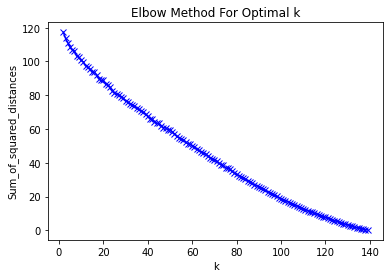

In [ ]:

Sum_of_squared_distances = []
range_n_clusters = range(2,len(event_list))
for k in range_n_clusters:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(X)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(range_n_clusters, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## Measuring silhoutte score for optimal cluster
# max_score = -1
# optimal_cluster = 2
# for n_clusters in range_n_clusters:
#     clusterer = KMeans(n_clusters=n_clusters)
#     preds = clusterer.fit_predict(X)
#     centers = clusterer.cluster_centers_

#     score = silhouette_score(X, preds)
#     print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

#     if score > max_score:
#         optimal_cluster = n_clusters

# print(optimal_cluster)

In [ ]:
event_file.cluster.nunique()
# event_file.cluster

28

In [ ]:
# true_k = 30
# model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
# # model.fit(X.toarray())
# model.fit(X)
# labels=model.labels_
# title = event_list
# identifier = event_file.id.tolist()
# wiki_cl=pd.DataFrame(list(zip(identifier, title,labels)),columns=['id','sentence','cluster'])
# print(wiki_cl.sort_values(by=['cluster']))

        id                                           sentence  cluster
24      30   If their platform held any other, it was in s...        0
91     104   The proper limitation of the veto, he contend...        1
59      65   Lincoln then went into a terse though rapid r...        2
0        2   I am now about to start for home  and I desir...        3
760    948                                                  A        3
...    ...                                                ...      ...
951   1191                                           ALS, DLC       49
973   1213                                             July 4       50
1073  1401                                    , July 28, 1849       50
996   1238                                             July 9       50
1076  1404   It is understood that the President at first ...       51

[1306 rows x 3 columns]


In [ ]:
# Gaussian Mixture model
n_components = event_file.cluster.nunique()
model = GaussianMixture(n_components = n_components)
model.fit(X)
labels=model.predict(X)
title = event_list
identifier = event_file.id.tolist()
wiki_cl=pd.DataFrame(list(zip(identifier, title,labels)),columns=['id','sentence','cluster'])
print(wiki_cl.sort_values(by=['id']))

In [ ]:
cdict = {}
ldict = {}
key = []
response = []
# identifier = event_file.id.tolist()
# identifier
for i, lab in zip(identifier, labels):
    try:
        cdict[lab].add(i)
    except:
        cdict[lab] = {i}
for k, v in cdict.items():
    response.append(v)

ground_truth_id = event_file.id.tolist()
ground_truth_lab = event_file.cluster.astype(int).tolist()

for i, lab in zip(ground_truth_id, ground_truth_lab):
    try:
        ldict[lab].add(i)
    except:
        ldict[lab] = {i}
#     key.append(set(x))
ldict

for k, v in ldict.items():
    key.append(v)

In [ ]:
print(muc(key, response))
print(b_cubed(key, response))
print(ceaf_e(key, response))
print(blanc(key, response))

NameError: ignored

In [ ]:
from sklearn.preprocessing import normalize
data_scaled = normalize(X)


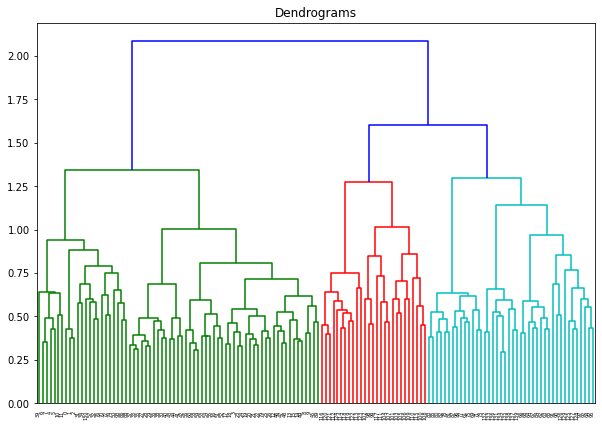

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms") 
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

In [ ]:
n_cluster = event_file.cluster.nunique()
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(distance_threshold=0.6, n_clusters=None, affinity='euclidean', linkage='ward')  
# cluster = AgglomerativeClustering(n_clusters=n_cluster, affinity='euclidean', linkage='ward') 

labels=cluster.fit_predict(data_scaled)
title = event_list
identifier = event_file.id.tolist()
wiki_cl=pd.DataFrame(list(zip(identifier, title,labels)),columns=['id','sentence','cluster'])
print(wiki_cl.sort_values(by=['id']))

      id                                           sentence  cluster
0      0  the first case was confirmed in Kerala's Thris...        2
1      1  the second case was reported in Kerala's Alapp...        2
2      2  the third case was reported in Kerala's Kasara...        2
3      3  the Union Health Ministry reported two more ca...       18
4      4  88 people who were in contact with the Hyderab...        0
..   ...                                                ...      ...
135  135  In the past week, India has reported 1,148 dea...       22
136  136  More than 85% of affected districts reported o...       62
137  137  India reports highest number of daily cases at...        8
138  138  Five states, namely, Maharashtra, Kerala, Karn...       27
139  139  In the past week 1,631,636 cases reported in c...        8

[140 rows x 3 columns]


In [ ]:
print(muc(key, response))
print(b_cubed(key, response))
print(ceaf_e(key, response))
print(blanc(key, response))

In [ ]:
# with sentence embeddings
# (0.5, 0.5, 0.5)
# (0.4354166666666666, 0.5466269841269841, 0.48472488803582847)
# (0.3737826709631221, 0.3737826709631221, 0.3737826709631221)
# (0.5586385497595264, 0.6019062658620495, 0.5680344164521071)

# with sentence and tag embedding concatenation
# (0.7352941176470589, 0.7352941176470589, 0.7352941176470589)
# (0.626736111111111, 0.7527777777777778, 0.6839989372710238)
# (0.5311688311688312, 0.5311688311688312, 0.5311688311688312)
# (0.6752633526101602, 0.8013324108378342, 0.713818894041953)

In [ ]:
def trace(cluster: ty.Set, partition: ty.Iterable[ty.Set]) -> ty.Iterable[ty.Set]:
    remaining = set(cluster)
    for a in partition:
        common = remaining.intersection(a)
        if common:
            remaining.difference_update(common)
            yield common
    for x in sorted(remaining):
        yield set((x,))
        
class RemapClusteringsReturn(ty.NamedTuple):
    clusterings: ty.Sequence[ty.Sequence[ty.Sequence[int]]]
    elts_map: ty.Dict[ty.Hashable, int]


def remap_clusterings(
    clusterings: ty.Sequence[ty.Sequence[ty.Set[ty.Hashable]]],
) -> RemapClusteringsReturn:
    """Remap clusterings of arbitrary elements to clusterings of integers."""
    elts = set(e for clusters in clusterings for c in clusters for e in c)
    elts_map = {e: i for i, e in enumerate(elts)}
    res = []
    for clusters in clusterings:
        remapped_clusters = []
        for c in clusters:
            remapped_c = [elts_map[e] for e in c]
            remapped_clusters.append(remapped_c)
        res.append(remapped_clusters)
    return RemapClusteringsReturn(res, elts_map)

def muc(
    key: ty.Sequence[ty.Set], response: ty.Sequence[ty.Set]
) -> ty.Tuple[float, float, float]:

    # Edge case
    if all(len(k) == 1 for k in key) or all(len(r) == 1 for r in response):
        return 0.0, 0.0, 0.0
    R = sum(len(k) - sum(1 for _ in trace(k, response)) for k in key) / sum(
        len(k) - 1 for k in key
    )
    P = sum(len(r) - sum(1 for _ in trace(r, key)) for r in response) / sum(
        len(r) - 1 for r in response
    )
    F = harmonic_mean((R, P))
    return R, P, F

def b_cubed(
    key: ty.Sequence[ty.Set], response: ty.Sequence[ty.Set]
) -> ty.Tuple[float, float, float]:
    if sum(len(k) for k in key) == 0:
        R = 0.0
    else:
        R = math.fsum(
            len(k.intersection(r)) ** 2 / len(k) for k in key for r in response
        ) / sum(len(k) for k in key)
    if sum(len(r) for r in response) == 0:
        P = 0.0
    else:
        P = math.fsum(
            len(r.intersection(k)) ** 2 / len(r) for r in response for k in key
        ) / sum(len(r) for r in response)
    F = harmonic_mean((R, P))
    return R, P, F

def ceaf(
    key: ty.Sequence[ty.Set],
    response: ty.Sequence[ty.Set],
    score: ty.Callable[[ty.Set, ty.Set], float],
) -> ty.Tuple[float, float, float]:
    if len(response) == 0 or len(key) == 0:
        return 0.0, 0.0, 0.0
    else:
        cost_matrix = np.array([[-score(k, r) for r in response] for k in key])
        # TODO: See https://github.com/allenai/allennlp/issues/2946 for ideas on speeding
        # the next line up
        row_ind, col_ind = linear_sum_assignment(cost_matrix)
        total_score = -cost_matrix[row_ind, col_ind].sum()
        R = total_score / math.fsum(score(k, k) for k in key)
        P = total_score / math.fsum(score(r, r) for r in response)
        F = harmonic_mean((R, P))
        return R, P, F
def ceaf_e(
    key: ty.Sequence[ty.Set], response: ty.Sequence[ty.Set]
) -> ty.Tuple[float, float, float]:

    def Φ_4(k, r):
        return 2 * len(k.intersection(r)) / (len(k) + len(r))

    return ceaf(key, response, Φ_4)

def blanc(
    key: ty.Sequence[ty.Set], response: ty.Sequence[ty.Set], fast=True,
) -> ty.Tuple[float, float, float]:
    r"""
    Return the BLANC `$(R, P, F)$` scores for a `#response` clustering given a `#key` clustering.
    ## Notes
      - Mention identifiers have to be comparable
      - To ensure the compliance with the reference implementation, the edge cases results are
        those from Recasens and Hovy (2011) rather than from the more recent Luo et al. (2014) when
        those two disagree. This has an effect for the N-6 testcase, where according to Luo et al.
        (2014), BLANC should be `$\frac{0+F_n}{2}$` since `$C_k=∅$` and `$C_r≠∅$`, but according to
        Recasens and Hovy (2011), BLANC should be `$F_n$`.
    """
    if fast:
        C_score, N_score = fast_detailed_blanc(key, response)
    else:
        C_score, N_score = detailed_blanc(key, response)
    if C_score is None:
        assert N_score is not None  # nosec:B101
        return N_score
    if N_score is None:
        assert C_score is not None  # nosec:B101
        return C_score
    return ty.cast(
        ty.Tuple[float, float, float],
        tuple(np.mean((C_score, N_score), axis=0).tolist()),
    )


def links_from_clusters(
    clusters: ty.Iterable[ty.Set],
) -> ty.Tuple[
    ty.Set[ty.Tuple[ty.Hashable, ty.Hashable]],
    ty.Set[ty.Tuple[ty.Hashable, ty.Hashable]],
]:
    r"""
    Return a `(coreference_links, non-coreference_links)` tuple corresponding to a clustering.
    The links are given as sorted couples for uniqueness
    """
    clusters_lst = [list(c) for c in clusters]
    C = set()
    N = set()
    for i, c in enumerate(clusters_lst[:-1]):
        for j, e in enumerate(c[:-1]):
            # Since the links are symmetric, we only add the links between `e` and
            # the following mentions
            for f in c[j + 1 :]:
                C.add((e, f) if e <= f else (f, e))
        for other in clusters_lst[i + 1 :]:
            for e in c:
                for f in other:
                    N.add((e, f) if e <= f else (f, e))
    #  We missed the coreference links for the last cluster, add them here
    last_cluster = clusters_lst[-1]
    for j, e in enumerate(last_cluster):
        for f in last_cluster[j + 1 :]:
            C.add((e, f) if e <= f else (f, e))
    return C, N


def detailed_blanc(
    key: ty.Sequence[ty.Set], response: ty.Sequence[ty.Set]
) -> ty.Tuple[
    ty.Union[ty.Tuple[float, float, float], None],
    ty.Union[ty.Tuple[float, float, float], None],
]:
    """Return BLANC `$(R, P, F)$` scores for coreference and non-coreference respectively."""

    # Edge case : a single mention in both `key` and `response` clusters
    # in that case, `C_k`, `C_r`, `N_k` and `N_r` are all empty, so we need a separate examination
    # of the mentions to know if we are very good or very bad.
    if len(key) == len(response) == 1 and len(key[0]) == len(response[0]) == 1:
        if key[0] == response[0]:
            return ((1.0, 1.0, 1.0), (1.0, 1.0, 1.0))
        else:
            return ((0.0, 0.0, 0.0), (0.0, 0.0, 0.0))

    C_k, N_k = links_from_clusters(key)
    C_r, N_r = links_from_clusters(response)

    tp_c = len(C_k.intersection(C_r))
    tp_n = len(N_k.intersection(N_r))
    c_k, n_k = len(C_k), len(N_k)
    c_r, n_r = len(C_r), len(N_r)

    if not c_k and not c_r:
        R_c, P_c, F_c = (1.0, 1.0, 1.0)
    elif not c_k or not c_r:
        R_c, P_c, F_c = (0.0, 0.0, 0.0)
    else:
        R_c, P_c = tp_c / c_k, tp_c / c_r
        F_c = 2 * tp_c / (c_k + c_r)

    if not n_k and not n_r:
        R_n, P_n, F_n = (1.0, 1.0, 1.0)
    elif not n_k or not n_r:
        R_n, P_n, F_n = (0.0, 0.0, 0.0)
    else:
        R_n, P_n = tp_n / n_k, tp_n / n_r
        F_n = 2 * tp_n / (n_k + n_r)

    # Edge cases
    if not c_k:
        return (None, (R_n, P_n, F_n))
    if not n_k:
        return ((R_c, P_c, F_c), None)

    return ((R_c, P_c, F_c), (R_n, P_n, F_n))


class AdjacencyReturn(ty.NamedTuple):
    """Represents a clustering of integers as an adjacency matrix and a presence mask"""

    adjacency: np.ndarray
    presence: np.ndarray


def adjacency(clusters: ty.List[ty.List[int]], num_elts: int) -> AdjacencyReturn:
    adjacency = np.zeros((num_elts, num_elts), dtype=np.bool)
    presence = np.zeros(num_elts, dtype=np.bool)
    # **Note** The nested loop makes the complexity of this `$∑|c|²$` but we are only doing memory
    # access, which is really fast, so this is not really an issue. In comparison, doing it by
    # computing the Gram matrix one-hot elt-cluster attribution matrix was making `fast_blanc` 3×
    # slower than the naïve version.
    for c in clusters:
        # Note: don't be clever and use numpy array indicing here, see
        # <https://docs.scipy.org/doc/numpy/user/basics.indexing.html?highlight=slice#assigning-values-to-indexed-arrays>
        # for why it would be slower. If you want to get C loops here, cythonize it instead (nut
        # it's probably not worth it)
        for e in c:
            presence[e] = True
            for f in c:
                if f != e:
                    adjacency[e, f] = True
    return AdjacencyReturn(adjacency, presence)


def fast_detailed_blanc(
    key: ty.Sequence[ty.Set], response: ty.Sequence[ty.Set]
) -> ty.Tuple[
    ty.Union[ty.Tuple[float, float, float], None],
    ty.Union[ty.Tuple[float, float, float], None],
]:
    """Return BLANC `$(R, P, F)$` scores for coreference and non-coreference respectively."""

    # Edge case : a single mention in both `key` and `response` clusters
    # in that case, `C_k`, `C_r`, `N_k` and `N_r` are all empty, so we need a separate examination
    # of the mentions to know if we are very good or very bad.
    if len(key) == len(response) == 1 and len(key[0]) == len(response[0]) == 1:
        if key[0] == response[0]:
            return ((1.0, 1.0, 1.0), (1.0, 1.0, 1.0))
        else:
            return ((0.0, 0.0, 0.0), (0.0, 0.0, 0.0))

    (key, response), mentions_map = remap_clusterings([key, response])
    num_mentions = len(mentions_map)

    key_coref_links, key_presence = adjacency(key, num_mentions)
    response_coref_links, response_presence = adjacency(response, num_mentions)

    tp_c = np.logical_and(key_coref_links, response_coref_links).sum() // 2
    c_k = key_coref_links.sum() // 2
    c_r = response_coref_links.sum() // 2

    # Headache ahead
    common_links = np.logical_and(
        np.outer(key_presence, key_presence),
        np.outer(response_presence, response_presence),
    )
    # There is no link between a mention and itself
    np.fill_diagonal(common_links, False)
    tp_n = (
        np.logical_and(
            common_links,
            np.logical_not(np.logical_or(key_coref_links, response_coref_links)),
        ).sum()
        / 2
    )
    num_key_mentions = key_presence.sum()
    n_k = (num_key_mentions * (num_key_mentions - 1)) // 2 - c_k
    num_response_mentions = response_presence.sum()
    n_r = (num_response_mentions * (num_response_mentions - 1)) // 2 - c_r

    if not c_k and not c_r:
        R_c, P_c, F_c = (1.0, 1.0, 1.0)
    elif not c_k or not c_r:
        R_c, P_c, F_c = (0.0, 0.0, 0.0)
    else:
        R_c, P_c = tp_c / c_k, tp_c / c_r
        F_c = 2 * tp_c / (c_k + c_r)

    if not n_k and not n_r:
        R_n, P_n, F_n = (1.0, 1.0, 1.0)
    elif not n_k or not n_r:
        R_n, P_n, F_n = (0.0, 0.0, 0.0)
    else:
        R_n, P_n = tp_n / n_k, tp_n / n_r
        F_n = 2 * tp_n / (n_k + n_r)

    # Edge cases
    if not c_k:
        return (None, (R_n, P_n, F_n))
    if not n_k:
        return ((R_c, P_c, F_c), None)

    return ((R_c, P_c, F_c), (R_n, P_n, F_n))

In [ ]:
print(muc(key, response))
print(b_cubed(key, response))
print(ceaf_e(key, response))
print(blanc(key, response))

(0.4353312302839117, 0.4353312302839117, 0.4353312302839117)
(0.16213466362869816, 0.24604795823768963, 0.19546595473853418)
(0.202868324257332, 0.202868324257332, 0.202868324257332)
(0.5347753430531704, 0.5607138701947878, 0.5419441428164795)


In [ ]:
import nltk
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()

tokens = nltk.tokenize.word_tokenize(event_file.Text[4] + event_file.sentence[4])
bigramFinder = nltk.collocations.BigramCollocationFinder.from_words(tokens)
trigramFinder = nltk.collocations.TrigramCollocationFinder.from_words(tokens)

# change this to read in your data
# finder = BigramCollocationFinder.from_words(file.Text[0])
# # only bigrams that appear 3+ times
# finder.apply_freq_filter(3) 

# return the 5 n-grams with the highest PMI
# finder.nbest(bigram_measures.pmi, 5)  

#bigrams
bigram_freq = bigramFinder.ngram_fd.items()
bigramFreqTable = pd.DataFrame(list(bigram_freq), columns=['bigram','freq']).sort_values(by='freq', ascending=False)
#trigrams
trigram_freq = trigramFinder.ngram_fd.items()
trigramFreqTable = pd.DataFrame(list(trigram_freq), columns=['trigram','freq']).sort_values(by='freq', ascending=False)

In [ ]:

# nltk.download('stopwords')
from nltk.corpus import stopwords
#get english stopwords
en_stopwords = set(stopwords.words('english'))
#function to filter for ADJ/NN bigrams
def rightTypes(ngram):
    if '-pron-' in ngram or 't' in ngram:
        return False
    for word in ngram:
        if word in en_stopwords or word.isspace():
            return False
    acceptable_types = ('JJ', 'JJR', 'JJS', 'NN', 'NNS', 'NNP', 'NNPS')
    second_type = ('NN', 'NNS', 'NNP', 'NNPS')
    tags = nltk.pos_tag(ngram)
    if tags[0][1] in acceptable_types and tags[1][1] in second_type:
        return True
    else:
        return False
#filter bigrams
filtered_bi = bigramFreqTable[bigramFreqTable.bigram.map(lambda x: rightTypes(x))]
#function to filter for trigrams
def rightTypesTri(ngram):
    if '-pron-' in ngram or 't' in ngram:
        return False
    for word in ngram:
        if word in en_stopwords or word.isspace():
            return False
    first_type = ('JJ', 'JJR', 'JJS', 'NN', 'NNS', 'NNP', 'NNPS')
    third_type = ('JJ', 'JJR', 'JJS', 'NN', 'NNS', 'NNP', 'NNPS')
    tags = nltk.pos_tag(ngram)
    if tags[0][1] in first_type and tags[2][1] in third_type:
        return True
    else:
        return False
#filter trigrams
filtered_tri = trigramFreqTable[trigramFreqTable.trigram.map(lambda x: rightTypesTri(x))]

In [ ]:
# from nltk import bigrams
# from nltk import trigrams
# # #filter for only those with more than 20 occurences
# # bigramFinder.apply_freq_filter(20)
# # trigramFinder.apply_freq_filter(20)
# bigramPMITable = pd.DataFrame(list(bigramFinder.score_ngrams(bigram_measures.pmi)), columns=['bigram','PMI']).sort_values(by='PMI', ascending=False)
# trigramPMITable = pd.DataFrame(list(trigramFinder.score_ngrams(bigram_measures.pmi)), columns=['trigram','PMI']).\
#                                     sort_values(by='PMI', ascending=False)

In [ ]:
filtered_bi

,bigram,freq
59,"(sagacious, Pennsylvania)",2
53,"(undisguised, opinion)",2
60,"(Pennsylvania, politician)",2
17,"(whig, star)",1
16,"(lone, whig)",1
8,"(Philadelphia, Convention)",1
37,"(document, room)",1
36,"(Whig, document)",1


In [ ]:
filtered_bi

,bigram,freq
36,"(Whig, document)",1
37,"(document, room)",1
8,"(Philadelphia, Convention)",1
17,"(whig, star)",1
16,"(lone, whig)",1
60,"(Pennsylvania, politician)",1
59,"(sagacious, Pennsylvania)",1
53,"(undisguised, opinion)",1
